In [1]:
# Deep Learning Libraries
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as data

# Data Manipulation and Analysis
import numpy as np
import pandas as pd
import collections # A module providing alternative data structures like named tuples, defaultdict, Counter, etc., compared to built-in Python containers.
import random

# Data Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn

# File and System Interaction
import glob
import os
from pathlib import Path
import shutil

# Scientific Computing and Math
import math
import cmath

# Date and Time Handling
import time
import datetime

# Linear Algebra
from torch import linalg as LA

# Neural Architecture
try:
    from torchinfo import summary
except:
    !pip install torchinfo
    from torchinfo import summary

In [2]:
# %load_ext autoreload
# %autoreload 2
%reload_ext autoreload

from python_scripts import dataset_processing
from python_scripts import architecture
from python_scripts import training
from python_scripts import logs_and_results

#### DataSet_Unfolded for Real World Sensing Data.py

In [3]:
# Setting up some global variables

ROOT = 'C:/Users/Talha/OneDrive - Higher Education Commission/Documents/GitHub/ConvHuberMC/HuberMC_Data'
TRY = '1st try'
SESSION = 'Session 1'

#### Model path of loading

Testing Training Loop

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device


'cpu'

In [5]:
# Get parameters --> for convhubermc: c, lambda, sigma, mu, delta, tau
def get_default_param(gpu = True):
    params_net = {}
    params_net['size1'] = 30
    params_net['size2'] = 50
    params_net['rank'] = 5
    
    params_net['device'] = 'cuda' if torch.cuda.is_available() else 'cpu'

    params_net['hubreg_iters'] = 2
    params_net['layers'] = 3
    params_net['initial_sigma'] = 0.67 # may not be learnable as then tau and lamda no longer needed
    params_net['initial_c'] = 1.345
    params_net['initial_lamda'] = 1
    params_net['initial_mu'] = 0
    params_net['CalInGPU'] = gpu
    
    return params_net

In [6]:
# seed = 123
# torch.manual_seed(seed)
# target = (torch.randn(30, 50))
# input_tensor = target * torch.bernoulli(torch.full((30, 50), 0.2))
# model = architecture.UnfoldedNet_Huber(params = get_default_param(False))

# criterion = nn.MSELoss()
# optimizer = torch.optim.Adam(model.parameters())

# model.train()
# output = model(input_tensor)

# loss = (criterion(output, target))/torch.square(torch.norm(target, p = 'fro'))
# optimizer.zero_grad()
# print(f'loss before backward: {loss}, loss.grad: {loss.requires_grad}')
# loss.backward()
# print(f'loss: {loss}')
# print("\nGradients after one epoch:")
# for name, param in model.named_parameters():
#     print(f'name: {name}\t\tgradient: {param.grad}')
# optimizer.step()

In [7]:
# # Create a input_tensor of random indices
# shuffled_indices = torch.randperm(input_tensor.nelement())

# # Index the original input_tensor with these shuffled indices
# shuffled_input_tensor = input_tensor.view(-1)[shuffled_indices].view(input_tensor.size())

# output = model(shuffled_input_tensor)

# loss = (criterion(output, target))/torch.square(torch.norm(target, p = 'fro'))
# optimizer.zero_grad()
# print(f'loss before backward: {loss}, loss.grad: {loss.requires_grad}')
# loss.backward()
# print(f'loss: {loss}')
# print("\nGradients after one epoch:")
# for name, param in model.named_parameters():
#     print(f'name: {name}\t\tgradient: {param.grad}')
# optimizer.step()

In [8]:
# # Create a input_tensor of random indices
# shuffled_indices = torch.randperm(input_tensor.nelement())

# # Index the original input_tensor with these shuffled indices
# shuffled_input_tensor = input_tensor.view(-1)[shuffled_indices].view(input_tensor.size())

# output = model(shuffled_input_tensor)

# loss = (criterion(output, target))/torch.square(torch.norm(target, p = 'fro'))
# optimizer.zero_grad()
# print(f'loss before backward: {loss}, loss.grad: {loss.requires_grad}')
# loss.backward()
# print(f'loss: {loss}')
# print("\nGradients after one epoch:")
# for name, param in model.named_parameters():
#     print(f'name: {name}\t\tgradient: {param.grad}')
# optimizer.step()

In [9]:
model = architecture.UnfoldedNet_Huber(params = get_default_param(False))
model

UnfoldedNet_Huber(
  (huber_obj): Sequential(
    (0): Huber()
    (1): Huber()
    (2): Huber()
  )
)

In [10]:
# model.forward(torch.randn(30, 50) * torch.bernoulli(torch.full((30, 50), 0.2)))

In [11]:
# summary(model, input_size = [30, 50])

Project Name: 1st try HuberMC-Net Sampling Rate: 20.0% and DB 3.0
Configuring Network...

Instantiating Model...

Model Instantiated...

Parameters = 
{'size1': 30, 'size2': 50, 'rank': 5, 'device': 'cpu', 'hubreg_iters': 2, 'layers': 3, 'initial_sigma': 0.67, 'initial_c': 1.345, 'initial_lamda': 1, 'initial_mu': 0, 'CalInGPU': False}

Loading Data phase...
----------------


Finished loading.

Epoch: 1, 2024-02-01 17:21:52, 

Epoch [1/10], Lossmean:2.90069e-03, Validation lossmean:2.76132e+01
c: [1.3480578660964966, 1.3481671810150146, 1.3476941585540771], lamda: [1.0040292739868164, 1.004048228263855, 1.0030484199523926], mu: [0.0019766674377024174, 0.001990813296288252, 0.0015461633447557688]
Epoch: 2, 2024-02-01 17:24:46, 

Epoch [2/10], Lossmean:5.28784e-03, Validation lossmean:4.05162e+01
c: [1.3474725484848022, 1.3474256992340088, 1.3458389043807983], lamda: [1.005637764930725, 1.0056184530258179, 1.002534031867981], mu: [-4.7737448767293245e-05, -2.7703717933036387e-06, -0.002433409681543708]
Epoch: 3, 2024-02-01 17:27:57, 

Epoch [3/10], Lossmean:8.08765e-03, Validation lossmean:4.70184e+01
c: [1.347137451171875, 1.3470535278320312, 1.342785120010376], lamda: [1.006347417831421, 1.0063143968582153, 0.9999319911003113], mu: [-2.8147067496320233e-05, 3.5240271245129406e-05, 0.0005135546671226621]
Epoch: 4, 2024-02-01 17:30:49, 

Epoch [4/10], Lossmea

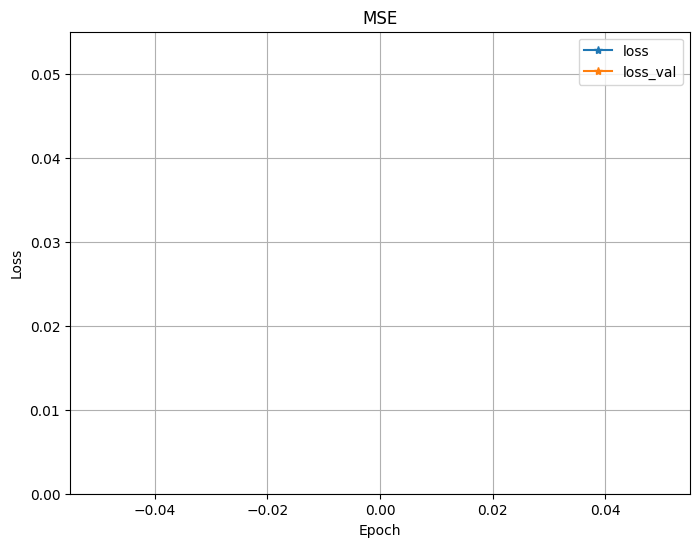

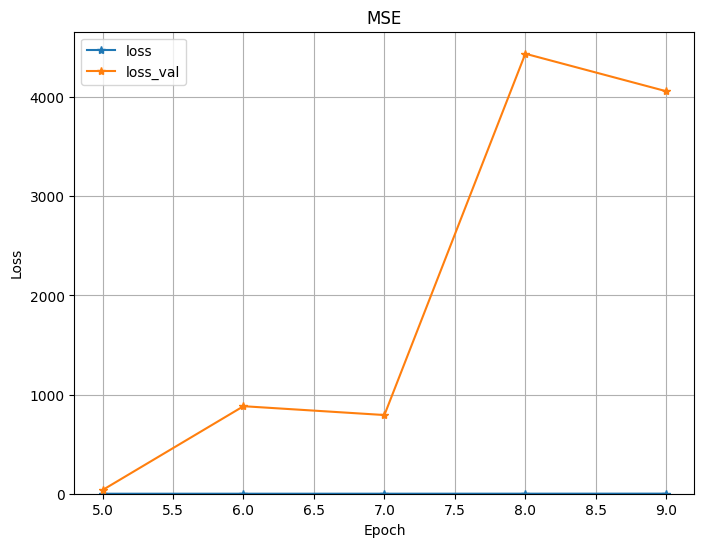

In [12]:
# Some settings for visualisation
matplotlib.use('Agg')
%matplotlib inline

seed = 123
torch.manual_seed(seed)

# Set parameters (including hyperparameters) and setting for saving/logging data

hyper_param_net = training.get_hyperparameter_grid('HuberMC-Net', TrainInstances = 10, ValInstances = 6, BatchSize = 2, ValBatchSize = 2, num_epochs = 10, learning_rate = 0.001)

params_net = get_default_param(gpu = False)

CalInGPU = params_net['CalInGPU']

q_list = [0.2]
db_list = [3.0]

for q in q_list:
  for db in db_list:
    # ProjectName = TRY + ' ' + logs_and_results.get_current_time() + ' ' + hyper_param_net['Model'] + ' ' + 'Sampling Rate: ' + logs_and_results.get_q_str(q) + ' and DB ' + logs_and_results.get_noise_str(db)
    
    ProjectName = TRY + ' ' + hyper_param_net['Model'] + ' ' + 'Sampling Rate: ' + logs_and_results.get_q_str(q) + ' and DB ' + logs_and_results.get_noise_str(db)
    # Note: Removed time stamp from log file name as : not supported. Weird because this was not a problem in linux
    
    # Get log file
    logfile = logs_and_results.get_modularized_record(ProjectName, q, db, 'Logs', hyper_param_net, params_net, SESSION)
    log = open(logfile, 'w')
    print('Project Name: %s'%ProjectName)
    log.write('Project Name: %s\n'%ProjectName)

    # Get Model
    net = training.get_model(params_net, hyper_param_net, log)
    print('Parameters = \n%s\n'%str(params_net))
    log.write('params_net = \n%s\n\n'%str(params_net))

    #Loading data and creating dataloader for both test and training
    print('Loading Data phase...')
    print('----------------')
    log.write('Loading phase...\n')
    log.write('----------------\n')
    shape_dset = (params_net['size1'], params_net['size2'])
    
    train_loader, val_loader = dataset_processing.get_dataloaders(params_net = params_net, hyper_param_net = hyper_param_net, sampling_rate = q, db = db)

    print('Finished loading.\n')
    log.write('Finished loading.\n\n');

    # Some additional settings for training including loss, optimizer,
    # floss = nn.functional.mse_loss(reduction = 'sum')
    floss = nn.MSELoss()
    optimizer = torch.optim.Adam(net.parameters(), lr = hyper_param_net['Lr'])
    # scheduler2 =  torch.optim.lr_scheduler.StepLR(optimizer, step_size= 1, gamma = 0.97, verbose = True)

    # Array for recording parameter values after each layer for each epoch etc
    outputs_L = architecture.to_var(torch.zeros([shape_dset[0], shape_dset[1]]), CalInGPU) 
    lossmean_vec = np.zeros((hyper_param_net['Epochs'], ))
    lossmean_val_vec = np.zeros((hyper_param_net['Epochs'], ))

    c_list, lamda_list, mu_list = net.getexp_LS()

    c_list_vec = np.zeros((hyper_param_net['Epochs'], net.layers))
    lamda_list_vec = np.zeros((hyper_param_net['Epochs'], net.layers))
    mu_list_vec = np.zeros((hyper_param_net['Epochs'], net.layers))

    # dummy variable to monitor and record progress for loss
    minloss = np.inf

    for epoch in range(hyper_param_net['Epochs']):
      print(f'Epoch: {epoch + 1}, {logs_and_results.get_current_time()}, \n')
      log.write('\n' + logs_and_results.get_current_time() + '\n')

      # Train and Test Steps. (Record every 5 epochs)
      if (epoch + 1) % 5 == 0:
          print('Loading and calculating training batches...')
          log.write('Loading and calculating training batches...\n')
          startime = time.time()
          loss_mean = training.train_step(net, train_loader, floss, optimizer, CalInGPU, hyper_param_net['TrainInstances'], hyper_param_net['BatchSize']) # remove alpha from train func
          endtime = time.time()
          print('Training time is %f'%(endtime - startime))
          log.write('Training time is %f\n'%(endtime - startime))

          print('Loading and calculating validation batches...')
          log.write('Loading and calculating validation batches...\n')
          startime = time.time()
          loss_val_mean = training.test_step(net, val_loader, floss, CalInGPU, hyper_param_net['ValInstances'], hyper_param_net['ValBatchSize'])
          endtime = time.time()
          print('Test time is %f'%(endtime - startime))
          log.write('Test time is %f\n'%(endtime - startime))

      else:
        loss_mean = training.train_step(net, train_loader, floss, optimizer, CalInGPU, hyper_param_net['TrainInstances'], hyper_param_net['BatchSize'])
        loss_val_mean = training.test_step(net, val_loader, floss, CalInGPU, hyper_param_net['ValInstances'], hyper_param_net['ValBatchSize'])

      # Update Record and Parameters
      lossmean_vec[epoch] = loss_mean
      lossmean_val_vec[epoch] = loss_val_mean

      c_list, lamda_list, mu_list = net.getexp_LS()

      c_list_vec[epoch, :] = c_list
      lamda_list_vec[epoch, :] = lamda_list
      mu_list_vec[epoch, :] = mu_list

      print('Epoch [%d/%d], Lossmean:%.5e, Validation lossmean:%.5e'
            %(epoch + 1, hyper_param_net['Epochs'], loss_mean, loss_val_mean))
      # print('loss_lowrank_mean', loss_lowrank_mean)
      # print('loss_val_lowrank_mean', loss_val_lowrank_mean)
      print(f'c: {c_list}, lamda: {lamda_list}, mu: {mu_list}')

      # Update Log after every 5 epochs. Make a plot of MSE against epochs every 5 epochs. Save Model in whole/dict form every five epochs.
      if (epoch + 1) % 5 == 0:
        print(f"Saving Whole Model at Epochs: [{epoch + 1}/{hyper_param_net['Epochs']}]")
        model_whole_path = logs_and_results.get_modularized_record(ProjectName, q, db, 'Saved Models - Whole', hyper_param_net, params_net, SESSION, current_epoch = epoch + 1)
        # torch.save(net, model_whole_path)
        print(f"Saving Model Dict at Epochs: [{epoch + 1}/{hyper_param_net['Epochs']}]")
        model_state_dict_path = logs_and_results.get_modularized_record(ProjectName, q, db, 'Saved Models - Dict', hyper_param_net, params_net, SESSION, current_epoch = epoch + 1)
        # torch.save(net.state_dict(), model_state_dict_path)

        # print('Epoch [%d/%d], Lossmean:%.5e, Validation lossmean:%.5e'
        # %(epoch + 1, hyper_param_net['Epochs'], loss_mean, loss_val_mean))
        # print('loss_lowrank_mean', loss_lowrank_mean)
        # print('loss_val_lowrank_mean', loss_val_lowrank_mean)
        # print(f'c: {c_list}, lamda: {lamda_list}, mu: {mu_list}')

        # log.write('loss_lowrank_mean %.5e\n' %(loss_lowrank_mean))
        # log.write('loss_val_lowrank_mean %.5e\n' %(loss_val_lowrank_mean))
        log.write('Epoch [%d/%d], Lossmean:%.5e, Validation lossmean:%.5e\n'
              %(epoch + 1, hyper_param_net['Epochs'], loss_mean, loss_val_mean))
        np.set_printoptions(precision = 3)

        log.write('c_list: '+ str(c_list)+'\n')
        log.write('lamda_list: '+ str(lamda_list)+'\n')
        log.write('mu_list: '+ str(mu_list)+'\n')

        if True or loss_val_mean < minloss:
          print('saved at [epoch%d/%d]'%(epoch + 1, hyper_param_net['Epochs']))
          log.write('saved at [epoch%d/%d]\n' %(epoch + 1, hyper_param_net['Epochs']))
          minloss = min(loss_val_mean, minloss)

        # Plotting MSE vs Epoch and Saving it

        # Get Directory where we have to save the plot
        dir = logs_and_results.get_modularized_record(ProjectName, q, db, 'Plots', hyper_param_net, params_net, SESSION, current_epoch = epoch + 1)
        epochs_vec = np.arange(0, hyper_param_net['Epochs'], 1)
        logs_and_results.plot_and_save_mse_vs_epoch(epochs_vec, lossmean_vec, hyper_param_net, lossmean_val_vec, dir, epoch)

    # Finish off by observing the minimum loss on validation set

    #Print min loss
    print('\nmin Loss = %.4e'%np.min(lossmean_val_vec))
    log.write('\nmin Loss = %.4e\n'%np.min(lossmean_val_vec))
    log.close()